# Luka Vukosi Nyathi

## Predictive Analytics 
## Assignment 2
## Date: 13-08-2024


GitHub Link: 

### Time Series Analysis

#### Imported Liberaries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preparation

#### Time Series Steps Dataset

In [426]:
dataset = pd.read_excel("Combined_steps.xlsx")
dataset.head(5)

,Date,Actual,Goal
0,2022-05-31,0,8000
1,2022-06-01,0,8000
2,2022-06-02,0,8000
3,2022-06-03,1102,8000
4,2022-06-04,1254,8000


#### The following operations are performed below

<ol>
    <li> Converting Date column into Date_Time
    <li>Change the index and set it to the Date column
    <li>Handle missing values
<ol>

##### 1 Converting Date column and formating

In [275]:
dataset["Date"] = pd.to_datetime(dataset["Date"]).dt.strftime('%d-%m-%Y')

In [277]:
dataset.head(5)

,Date,Actual,Goal
0,31-05-2022,0,8000
1,01-06-2022,0,8000
2,02-06-2022,0,8000
3,03-06-2022,1102,8000
4,04-06-2022,1254,8000


##### 2. Setting index to Date column

In [211]:
dataset.set_index("Date", inplace=True)

In [213]:
dataset.head(5)

,Actual,Goal
Date,,
31-05-2022,0,8000
01-06-2022,0,8000
02-06-2022,0,8000
03-06-2022,1102,8000
04-06-2022,1254,8000


##### 3. Handling missing values

In [17]:
null_values = dataset.isnull().sum()
pd.DataFrame(null_values)

,0
Actual,0
Goal,0


# 2. Explorary Data Analysis

##### In this section the following operations were performed
<ol>
   <li>Visualizing steps time series 
   <li>Descriptive statistics
<ol>
   

#### 1. Visualization of walking Steps over time

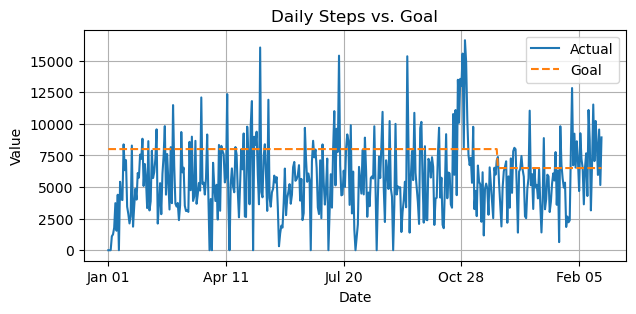

In [99]:
plt.figure(figsize=(7, 3))20
plt.plot(dataset["Actual"], label="Actual")
plt.plot(dataset["Goal"], label="Goal", linestyle='--')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.title("Daily Steps vs. Goal")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

#### Descriptive Statistics and Graphs

In [442]:
stats = dataset["Actual"].describe()
pd.DataFrame(stats)

,Actual
count,420.000000
mean,5674.140476
std,2930.565439
min,0.000000
25%,3634.000000
50%,5402.000000
75%,7349.000000
max,16611.000000


#### Additional Descriptive Statics

In [448]:
standard_div = dataset["Actual"].std()
average_df = pd.DataFrame({'standard diviation': [standard_div]})
average_df

,standard diviation
0,2930.565439


In [454]:
range_value = dataset["Actual"].max() - dataset["Actual"].min()
range_df  = pd.DataFrame({'Range': [range_value]})
range_df

,Range
0,16611


#### 2.1 Bar Graph

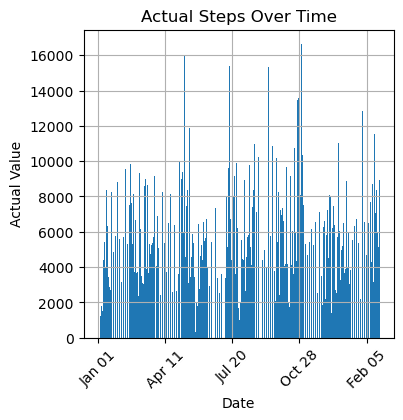

In [106]:
plt.figure(figsize=(4, 4))
plt.bar(dataset.index, dataset["Actual"])
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.ylabel("Actual Value")
plt.title("Actual Steps Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 2.2 Area Chart

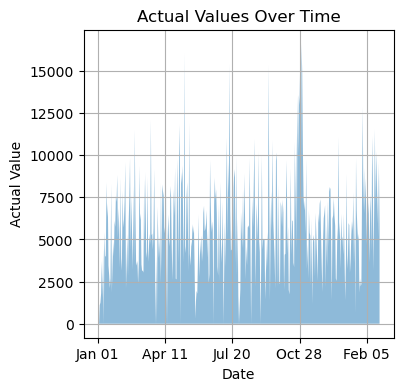

In [108]:
plt.figure(figsize=(4, 4))
plt.fill_between(dataset.index, dataset['Actual'], alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel("Date")
plt.ylabel("Actual Value")
plt.title("Actual Values Over Time")
plt.grid(True)
plt.show()

#### 2.3 Box Plot

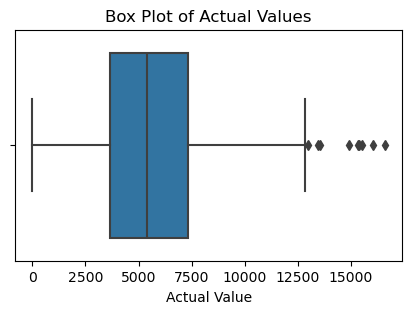

In [112]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=dataset['Actual'])
plt.xlabel('Actual Value')
plt.title('Box Plot of Actual Values')
plt.show()

# 3. Testing For Seasonality and If Data if Stationary

#### Breaking the data into Trend, Seasonal and Residual components

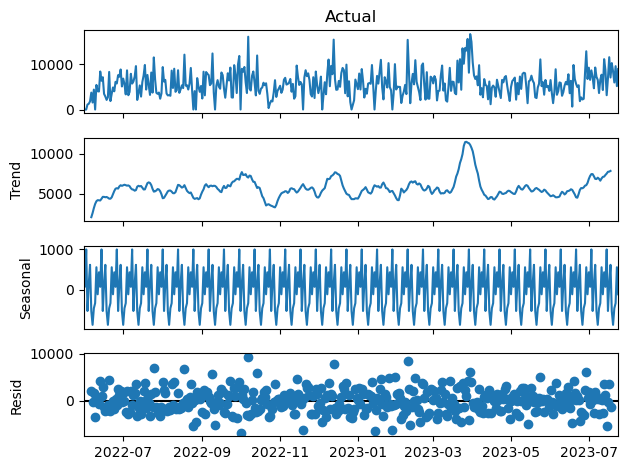

In [120]:
dataset.index = pd.to_datetime(dataset['Date'], dayfirst=True)
decomposition = seasonal_decompose(dataset['Actual'], model='Multiplicative', period=12)
decomposition.plot()
plt.show()

##### **Trend Plot** - The trend plot shows the daily fluctuations to reveal the underlying trend in the walking steps over time. In this case, we see some periods of increase and decrease in walking activity. Additional we can see that there is a spike around early 2023, suggesting that the period of increased activity which was later followed by a slight decline and then a gradual upward trend. 

##### This trend might show changes in habits, such as starting a new exercise routine.

##### **Seasonal Plot** - The seasonal component shows regular and repeating patterns in the data. The consistent trends in this plot suggest a strong daily or weekly routine influencing the walking steps. For example, this might represent higher activity levels on certain days of the week (like weekends) and lower activity on others

##### **Residual Plot** - The residual plot captures the randomness or noise in the data after accounting for the trend and seasonal components. Ideally, the residuals should be evenly distributed with no apparent pattern, indicating that the trend and seasonality components have successfully captured the major patterns in the data. In this plot, the residuals are scattered without a clear pattern, which suggests that the model has done a good job of isolating the key components

### Argumented Dickey-Fuller Test

In [128]:
def adf_test(timeseries):

    result = adfuller(timeseries)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    df_results = pd.DataFrame({"ADF Statistic": [adf_statistic],
                              "p-value": [p_value]})

    for key, value in critical_values.items():
        df_results[f'Critical Value ({key})'] = value

    return df_results

result_df = adf_test(dataset["Actual"])
result_df

,ADF Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%)
0,-4.831054,0.000047,-3.44656,-2.868685,-2.570576


#### **ADF Test Results** 
##### ADF Statistic vs Critical values
<ol>
    <li>The ADF statistic -4.83, is less than all the critical values at all significance levels of (1%, 5%, and 10%).
    <li>which suggests that the time series has a unit root is false
    </li>


##### P-values

<ol>
    <li>The p-value of 0.000047 is significantly lower than common significance levels (0.01, 0.05, 0.10).
    <li>A low p-value strongly suggests that the series is stationary.

##### The ADF Test suggest that the time series data of steps is **stationary**

# 4. Model Selection: SARIMA

##### ACF and PACF Plots

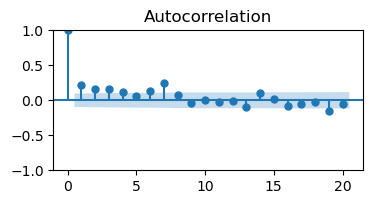

In [137]:
plt.figure(figsize=(4, 4))
ax1 = plt.subplot(211)
plot_acf(dataset["Actual"], lags=20, ax=ax1)
plt.show()

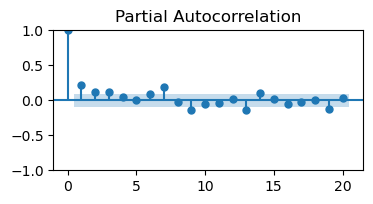

In [134]:
plt.figure(figsize=(4, 4))
ax2 = plt.subplot(212)
plot_pacf(dataset["Actual"], lags=20, ax=ax2)
plt.show()

##### Seasonal Difference

In [37]:
dataset["Seasonal_Difference"] = dataset["Actual"] - dataset["Actual"].shift(12)

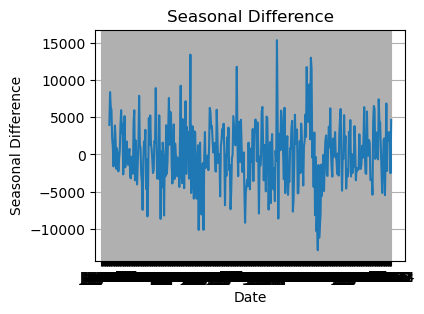

In [39]:
plt.figure(figsize=(4, 3))
plt.plot(dataset["Seasonal_Difference"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xlabel("Date")
plt.ylabel("Seasonal Difference")
plt.title("Seasonal Difference")
plt.grid(True)
plt.show()

##### Model Parameters


##### P = 1
##### Q = 1
##### s = 30
##### d = 0
##### D = 1

In [161]:
model = SARIMAX(dataset['Actual'], order=(1, 0, 1), seasonal_order=(1, 0, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

print(results.summary())

C:\Users\bless\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\bless\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\bless\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  _index = to_datetime(index)
C:\Users\bless\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                              Actual   No. Observations:                  420
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood               -3819.149
Date:                             Tue, 13 Aug 2024   AIC                           7646.297
Time:                                     13:58:26   BIC                           7662.333
Sample:                                 05-31-2022   HQIC                          7652.643
                                      - 07-24-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.004    266.606      0.000       0.992       1.007
ma.L1         -0.8647      

#### Results from SARIMAX Model

<ol>
   <li>AR (1): Coefficient = 0.9998, p-value = 0.0
   <li>MA (1): Coefficient = -0.8381, p-value = 0.0
   <li>Seasonal AR (1, 12): Coefficient = -0.0517, p-value = 0.005
   <li>Seasonal MA (1, 12): Coefficient = -0.9991, p-value = 0.0
   </ol>
The non-seasonal AR and MA terms, as well as the seasonal AR and MA terms, have a very low p-values, indicating that all coefficients are statistically significant.

#### Evaluation of model

AIC (Akaike Information Criterion): 7684.964 <br>
BIC (Bayesian Information Criterion): 7705.020<br>
Ljung-Box (L1) Q-statistic: p-value = 0.62<br>
Heteroskedasticity (H): p-value = 0.80<br>
Jarque-Bera (JB) Test: p-value = 0.00

##### The model seems to be doing well in terms of capturing the autocorrelation and maintaining consistent error variance

### Testing and Trainig The Model

#### Training Data

In [89]:
split_point = int(len(dataset) * 0.7)
train = dataset[:split_point]
test = dataset[split_point:]

training_data = pd.DataFrame(train)
training_data.tail(5)

,Actual,Goal,Seasonal_Difference
Date,,,
16-03-2023,6143,8000,4142.0
17-03-2023,6073,8000,1983.0
18-03-2023,3616,8000,-536.0
19-03-2023,3361,8000,-4160.0
20-03-2023,10772,8000,1083.0


#### Testing Data

In [93]:
testing_data = pd.DataFrame(test)
testing_data.tail(5)

,Actual,Goal,Seasonal_Difference
Date,,,
20-07-2023,8393,6500,1868.0
21-07-2023,5954,6500,2325.0
22-07-2023,9550,6500,2995.0
23-07-2023,5157,6500,-2508.0
24-07-2023,8923,6500,4634.0


In [175]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [181]:
test.index = pd.to_datetime(test.index)


# 5. Forecasting

### Spliting the dataset

In [229]:
start_date = pd.to_datetime("25-06-2023", dayfirst=True)
train_data = dataset[pd.to_datetime(dataset["Date"], format="%d-%m-%Y") < start_date]["Actual"]
test_data = dataset[pd.to_datetime(dataset["Date"], format="%d-%m-%Y") >= start_date]["Actual"]

In [334]:
frame2 = pd.DataFrame(train_data)
frame2.tail(3)

,Actual
387,4950
388,5343
389,1839


In [332]:
frame3 = pd.DataFrame(test_data)
frame3.tail(3)

,Actual
417,9550
418,5157
419,8923


In [289]:
dataset.head(5)

,Date,Actual,Goal
0,31-05-2022,0,8000
1,01-06-2022,0,8000
2,02-06-2022,0,8000
3,03-06-2022,1102,8000
4,04-06-2022,1254,8000


### Fitting the SARIMAX Model

In [291]:
dataset.set_index("Actual", inplace=True)

In [315]:
model = SARIMAX(frame2['Actual'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
try:
  model_fit = model.fit(method='nm', maxiter=500)
except ConvergenceWarning:
  print("Convergence Warning: Try a simpler model")
else:
  print("Model fit successfully")

Optimization terminated successfully.
         Current function value: 9.567843
         Iterations: 106
         Function evaluations: 191
Model fit successfully


In [320]:
model = SARIMAX(frame2['Actual'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
model_fit = model.fit()

The model was fitted successfully 

### Forecasting

In [344]:
forecast = model_fit.get_forecast(steps=len(test_data))
predictions = forecast.predicted_mean

In [352]:
results_df = pd.DataFrame({'Actual': frame3['Actual'], 'Predicted': predictions})
results_data = pd.DataFrame(results_df)
results_data

,Actual,Predicted
390,2664,4106.481292
391,2211,3987.987694
392,2365,4429.034717
393,7909,4515.968754
394,12829,5169.136968
395,6717,5048.376007
396,9217,4878.893836
397,6538,4828.108630
398,8618,5975.562568
399,7081,4383.729670


In [376]:
forecast = model_fit.get_forecast(steps=30)
predictions = forecast.predicted_mean 
results_data = pd.DataFrame({'Actual': ..., 'Predicted': predictions})

print(results_df)

     Actual    Predicted
390    2664  4106.481292
391    2211  3987.987694
392    2365  4429.034717
393    7909  4515.968754
394   12829  5169.136968
395    6717  5048.376007
396    9217  4878.893836
397    6538  4828.108630
398    8618  5975.562568
399    7081  4383.729670
400    4679  5019.582820
401    9253  5707.287477
402    7201  4480.881987
403    6525  4186.512202
404    3629  4708.945170
405    6555  4588.024164
406    7665  5341.991735
407    4289  4950.458424
408   11093  5236.184905
409    8706  5038.619809
410    3151  6077.523210
411    6908  4528.313091
412   11524  5152.320640
413    7049  5635.567327
414   10224  4579.582479
415    8393  4293.791372
416    5954  4812.254594
417    9550  4701.472094
418    5157  5450.522994
419    8923  5072.197093


### Forecasting Graph

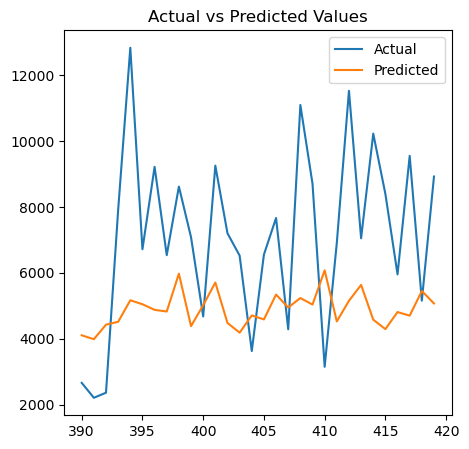

In [382]:
plt.figure(figsize=(5, 5))
plt.plot(results_df['Actual'], label='Actual')
plt.plot(results_df['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### Testing the Forecast for accuracy

In [414]:
r2 = r2_score(results_df['Actual'], results_df['Predicted'])
print("R-squared:", r2)

R-squared: -0.5979036560919135


In [430]:
predicted_average = results_df["Predicted"].mean()
average_df = pd.DataFrame({'Predicted_Average': [predicted_average]})
average_df

,Predicted_Average
0,4896.177124


In [432]:
actual_average = dataset["Actual"].mean()
average_df = pd.DataFrame({'Actual_Average': [actual_average]})
average_df

,Actual_Average
0,5674.140476


##### Although the R-squared is less than zero, judging by the predicated average we can say the model is almost accurate and the average steps to the actual and the predicted steps are not far apart

#### **Therefor for the next 30 Days Proff is more likely to walk an average of 4896 steps**

# 6. Reflection

**The process of selecting SARIMA as the model for my data was largely influenced by the data's stationarity and seasonal patterns. I found myself drawn to SARIMA due to its ability to capture these components. The model's structure, with its components for autoregression, differencing, and moving average, offered a framework for capturing the underlying patterns in our data.**

**The predicted average walking steps of 4896.177124 provides a baseline understanding of the dataset. While this figure offers a general overview, it's crucial to consider the distribution of the data, potential outliers, and the model's accuracy when interpreting this value. A deeper dive into metrics like standard deviation or confidence intervals would provide a more comprehensive picture.**

**Looking back I believe that exploring other time series models,like ARIMA or Exponential Smoothing, could offer alternative perspectives. Additionally, a more extensive analysis of the data, including feature engineering and potential external factors, might have improved the model's predictive power.**